In [1]:
import librosa as lr
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from matrixprofile import matrixProfile

/home/will/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/will/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
import ffmpeg

In [3]:
def extract_audio(vfile):
    stream = ffmpeg.input(vfile)
    out = ffmpeg.output(stream.audio, 'out.m4a')
    out.run(overwrite_output=True)


In [4]:
extract_audio('samples/v1/zoom_0.mp4')

In [5]:
x, sr = lr.core.load('out.mp3', sr=22050//2)

/home/will/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [ ]:
x.shape[0] / sr

In [ ]:
sample[1]

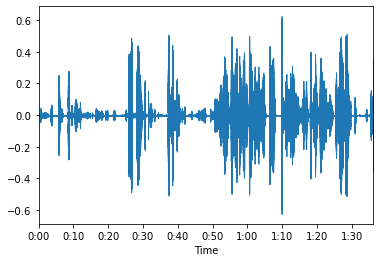

In [6]:
librosa.display.waveplot(x, sr=sr)

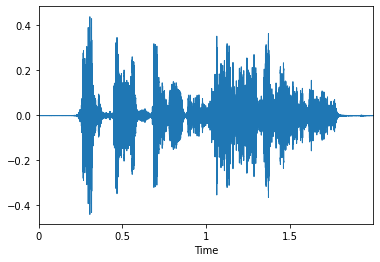

In [7]:
librosa.display.waveplot(x[66 * sr:68 * sr], sr=sr)

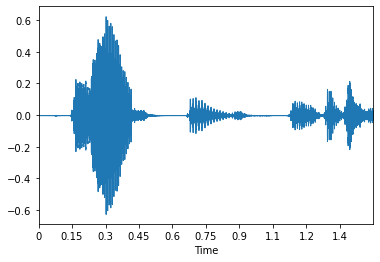

In [8]:
librosa.display.waveplot(x[int(69.5 * sr):71 * sr], sr=sr)

In [9]:
ipd.Audio(x[int(69.5 * sr):71 * sr], rate=sr)

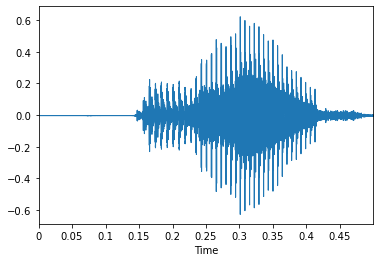

In [10]:
# piece = x[int((69.5) * sr):71 * sr]
piece = x[int((69.5) * sr):70 * sr]
# piece = x[int((70.1) * sr):int(70.5 * sr)]
librosa.display.waveplot(piece, sr=sr)
ipd.Audio(piece, rate=sr)

In [12]:
slow_x, slow_sr = lr.core.load('out.mp3', sr=22050//10)
# profile = matrixProfile.stomp(slow_x, int(slow_sr * 0.1))
profile = matrixProfile.scrimp_plus_plus(slow_x, int(slow_sr * 0.1), runtime=60)

/home/will/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/will/anaconda3/lib/python3.7/site-packages/matrixprofile/scrimp.py:43: RuntimeWarning: invalid value encountered in sqrt
  sigmax = np.sqrt(sigmax2)
/home/will/anaconda3/lib/python3.7/site-packages/matrixprofile/scrimp.py:67: RuntimeWarning: divide by zero encountered in true_divide
  dist = (z[m - 1:n] - m * meanx * meany) / (sigmax * sigmay)
/home/will/anaconda3/lib/python3.7/site-packages/matrixprofile/scrimp.py:69: RuntimeWarning: invalid value encountered in multiply
  dist = np.real(2 * dist)
/home/will/anaconda3/lib/python3.7/site-packages/matrixprofile/scrimp.py:215: RuntimeWarning: invalid value encountered in less
  update_pos1 = np.argwhere(tmp_a < tmp_b).flatten()
/home/will/anaconda3/lib/python3.7/site-packages/matrixprofile/scrimp.py:224: RuntimeWarning: invalid value e

In [16]:
profile[1].shape

(211814,)

In [30]:
import numpy as np

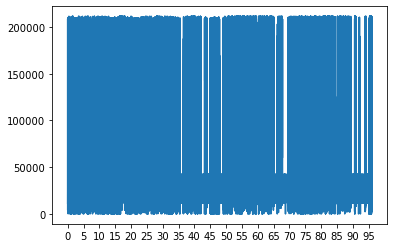

In [40]:
plt.plot(np.arange(0, len(profile[1]))/ slow_sr, profile[1])
plt.xticks(np.arange(0, len(profile[1]) // slow_sr, 5))
plt.show()

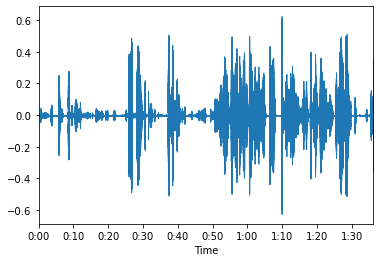

In [35]:
librosa.display.waveplot(x, sr=sr)

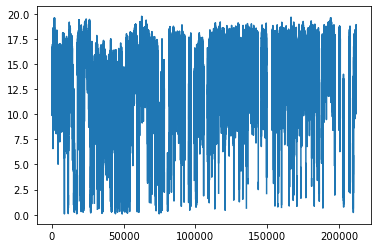

In [36]:
plt.plot(profile[0])

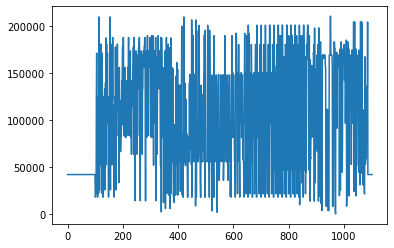

In [28]:
plt.plot(profile[1][int((69.5) * slow_sr):70 * slow_sr])

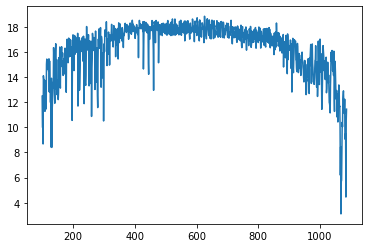

In [25]:
plt.plot(profile[0][int((69.5) * slow_sr):70 * slow_sr])

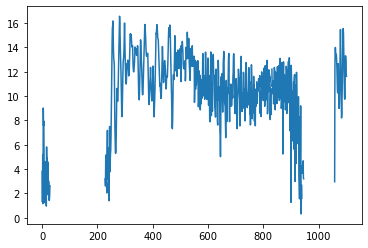

In [27]:
plt.plot(profile[0][int((21) * slow_sr):int(21.5 * slow_sr)])

In [ ]:
plt.plot(profile[0])

In [13]:
print(profile.shape)

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
int(sr*0.1)

In [45]:
good_x, good_sr = lr.core.load('samples/v1/good_audio.mp3', sr=sr)

/home/will/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


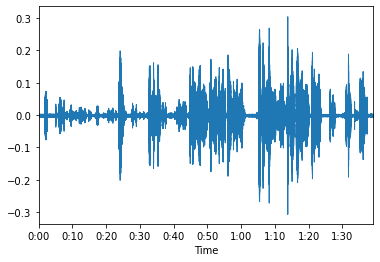

In [46]:
lr.display.waveplot(good_x, sr=good_sr)

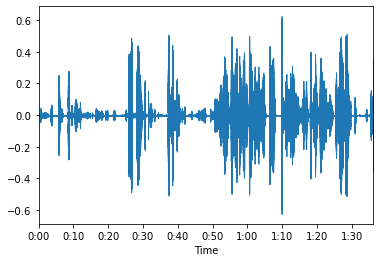

In [44]:
lr.display.waveplot(x, sr=sr)

In [50]:
corr = np.correlate(x[:sr * 5], good_x)

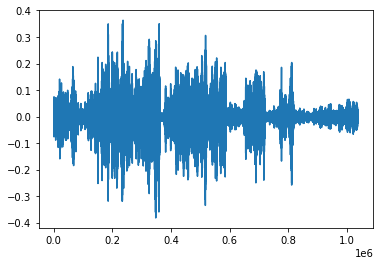

In [51]:
plt.plot(corr)

In [53]:
corr.shape

(1038137,)

In [52]:
corr.shape

(1038137,)